In [24]:
import os, sys
sys.path.insert(0, '/Users/weizheng/Programming/Django/evalstock')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "evalstock.settings")

import django
django.setup()

In [25]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

# Setup default matplotlib chinese font
font_name = './STHeiti_Medium_1.ttf'
font_prop = font_manager.FontProperties(fname=font_name)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['figure.figsize'] = (20.0, 10.0)

In [26]:
import pandas as pd
from django.db.models import Q

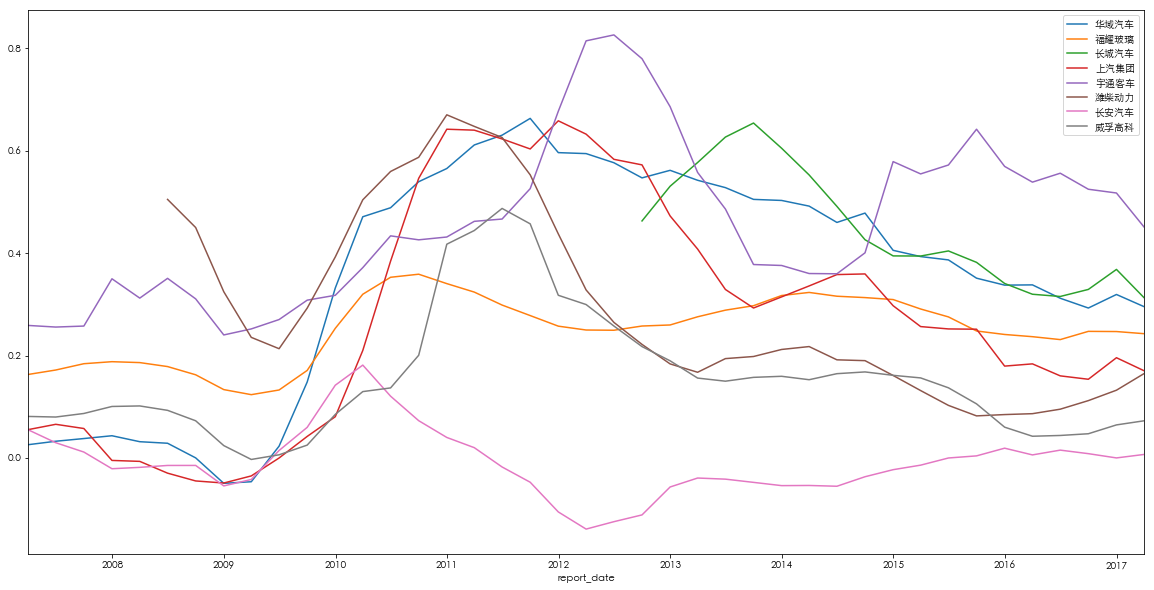

In [37]:
from magic_formula.models import HistoricalKpi

def show_roce_ttms(stock_codes: list):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    for stock_code in stock_codes:
        historical_kpi = HistoricalKpi.objects.filter(stock__stock_code=stock_code)
        roce_ttm_df = (pd.DataFrame(list(historical_kpi.values(
            'stock__stock_name', 'report_date', 'roce_ttm')))
            .set_index('report_date'))
        roce_ttm_df['roce_ttm'].plot(label=roce_ttm_df['stock__stock_name'][-1])

    plt.legend()
    plt.show()

show_roce_ttms(['600741.sh', '600660.sh', '601633.sh', '600104.sh', 
                '600066.sh', '000338.sz', '000625.sz', '000581.sz'])